# Preliminary LDA

Preliminary LDA looking at topic numbers

In [41]:
# import modules
import numpy as np
from time import time
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
import re
import matplotlib.pyplot as plt

% matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\medacola\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\medacola\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
# import data
df = pd.read_pickle('labour_speeches_para_corpus1.pkl')

# show data to check
df.head()

,Sent_id,Tokens,Speech,Paragraph,Year
0,1,"[meet, week, united, party, advancing, every, ...","Leader's speech, Brighton 2017","We meet here this week as a united Party, adva...",2017
1,2,"[privilege, speaking, brighton, city, long, hi...","Leader's speech, Brighton 2017",And it’s a privilege to be speaking in Bright...,2017
2,3,"[century, ago, brighton, teenage, shop, worker...","Leader's speech, Brighton 2017","It was over a century ago, here in Brighton, ...",2017
3,4,"[role, seconded, historic, resolution, trades,...","Leader's speech, Brighton 2017",In that role she seconded the historic resolu...,2017
4,5,"[became, labour, party, woman, margaret, bondf...","Leader's speech, Brighton 2017",That became the Labour Party and it was this...,2017


In [43]:
df['Year'].value_counts().values

array([570, 437, 432, 395, 314, 298, 271, 230, 207, 202, 178, 162, 156,
       152, 148, 145, 134, 124, 116, 112, 109, 103, 101,  96,  95,  90,
        85,  84,  84,  78,  77,  77,  73,  73,  71,  70,  67,  61,  61,
        60,  60,  58,  57,  56,  56,  55,  53,  52,  51,  49,  48,  40,
        39,  31,  27,  18,  14,  13,  13,   5,   2], dtype=int64)

In [44]:
# extract tokens as list
words = df['Tokens'].values

In [45]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
# gensim Dictionary function creates tokens -> tokenID dict
dictionary = Dictionary(words)
print('Number of unique words in initital documents:', len(dictionary))

org_dict = len(dictionary)

# Filter out words that occur less than 10 documents, or more than 70% of the documents.
dictionary.filter_extremes(no_below=5, no_above=0.7)
print('Number of unique words after removing rare and common words:', len(dictionary))

filt_dict = len(dictionary)

print('Token reduction of: ' + str((1-filt_dict/org_dict)*100)+'%')

Number of unique words in initital documents: 14868
Number of unique words after removing rare and common words: 4637
Token reduction of: 68.81221415119721%


In [46]:
# transform to bag of words
corpus = [dictionary.doc2bow(doc) for doc in words]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 4637
Number of documents: 7195


In [47]:
doc = corpus[9]
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)
# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

united 1
tories 1
ready 1
certainly 1
clearly 1


Average length: 54.52314107018763 words.


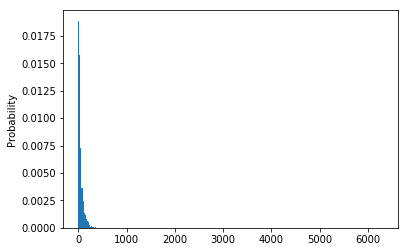

In [48]:
# word per sentence
len_art = [len(x.split(' ')) for x in df['Paragraph']]

%matplotlib inline
x = np.array(len_art)
plt.hist(x, density=True, bins=500)
plt.ylabel('Probability');

print('Average length: '+ str(np.mean(len_art))+' words.')

In [49]:
NUM_TOPICS = 40
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)


topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(24, '0.069*"industry" + 0.059*"problems" + 0.035*"government" + 0.030*"problem" + 0.025*"con" + 0.017*"yesterday" + 0.016*"case" + 0.015*"rule" + 0.013*"form" + 0.012*"forward"')
(22, '0.038*"power" + 0.032*"people" + 0.025*"make" + 0.023*"socialism" + 0.018*"carry" + 0.017*"prepared" + 0.017*"government" + 0.017*"said" + 0.016*"abroad" + 0.014*"needed"')
(6, '0.056*"movement" + 0.039*"one" + 0.030*"socialist" + 0.026*"conference" + 0.021*"principles" + 0.021*"terms" + 0.021*"war" + 0.019*"national" + 0.019*"read" + 0.017*"debate"')
(29, '0.081*"year" + 0.051*"measures" + 0.047*"last" + 0.028*"present" + 0.028*"years" + 0.024*"industrial" + 0.021*"day" + 0.020*"conference" + 0.020*"week" + 0.017*"thank"')
(3, '0.089*"society" + 0.042*"means" + 0.034*"state" + 0.033*"new" + 0.028*"system" + 0.027*"must" + 0.019*"welfare" + 0.018*"responsibility" + 0.017*"created" + 0.017*"need"')
(7, '0.033*"world" + 0.022*"europe" + 0.021*"britain" + 0.021*"policy" + 0.019*"us" + 0.019*"one" + 0.016*"

In [50]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.976401742149725

Coherence Score:  0.32974408676454015


In [51]:
# Visualize the topics
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

C:\Users\medacola\AppData\Local\Continuum\anaconda3\envs\topicmodel1\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10     0.148954  0.176022       1        1  5.321634
16     0.087785  0.012006       2        1  4.798380
7      0.057814  0.037207       3        1  3.986221
8     -0.045021  0.057566       4        1  3.627682
36    -0.105356  0.139199       5        1  3.423063
14    -0.007965  0.018269       6        1  3.362074
12     0.088126  0.203718       7        1  3.305396
20    -0.145689 -0.022111       8        1  3.037630
19     0.112329  0.043560       9        1  3.032810
33    -0.007902  0.067440      10        1  3.006668
28    -0.117586  0.089703      11        1  2.846799
31     0.050963 -0.059703      12        1  2.726217
30     0.156194 -0.053530      13        1  2.713522
26    -0.121118  0.135320      14        1  2.579411
4      0.130044  0.113403      15        1  2.501778
38     0.055242  0.075764      16        1  2.487061
3      0.150037 -0.101303      17        1  2.481487
39     0.123920 -0.092161      18        1  2.480916
22     0.045236  0.147182      19        1  2.385782
35    -0.134492  0.003206      20        1  2.303018
29    -0.207426 -0.004829      21        1  2.299712
6     -0.044498 -0.009475      22        1  2.287695
21     0.014325 -0.024192      23        1  2.259410
13     0.056637 -0.006885      24        1  2.166171
1     -0.195250  0.057735      25        1  2.133778
24    -0.027484 -0.065729      26        1  2.095928
23    -0.166182 -0.043432      27        1  2.063937
11     0.154486 -0.019962      28        1  2.023614
0      0.123184 -0.009791      29        1  1.954985
37    -0.038416 -0.095271      30        1  1.954402
34    -0.036783 -0.030615      31        1  1.792894
9      0.024066 -0.173876      32        1  1.784883
18    -0.021602 -0.186774      33        1  1.749554
32    -0.034281  0.107853      34        1  1.731816
2      0.007976 -0.009446      35        1  1.620610
5      0.016227 -0.139087      36        1  1.620487
15     0.019280 -0.094980      37        1  1.544728
27    -0.059653 -0.124459      38        1  1.541937
17    -0.069356  0.012996      39        1  1.519564
25    -0.036764 -0.130535      40        1  1.446345, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
17    Default  1090.000000          party  1090.000000  30.0000  30.0000
29    Default  1179.000000         labour  1179.000000  29.0000  29.0000
18    Default  1806.000000         people  1806.000000  28.0000  28.0000
791   Default   757.000000           year   757.000000  27.0000  27.0000
598   Default   443.000000     industrial   443.000000  26.0000  26.0000
602   Default   414.000000        society   414.000000  25.0000  25.0000
140   Default   516.000000         policy   516.000000  24.0000  24.0000
4     Default  1230.000000        britain  1230.000000  23.0000  23.0000
108   Default  1728.000000     government  1728.000000  22.0000  22.0000
193   Default  1187.000000             us  1187.000000  21.0000  21.0000
365   Default   545.000000         social   545.000000  20.0000  20.0000
3433  Default   350.000000          shall   350.000000  19.0000  19.0000
645   Default   809.000000          years   809.000000  18.0000  18.0000
686   Default   372.000000       industry   372.000000  17.0000  17.0000
740   Default   801.000000          world   801.000000  16.0000  16.0000
81    Default   490.000000         change   490.000000  15.0000  15.0000
62    Default   311.000000     parliament   311.000000  14.0000  14.0000
705   Default   366.000000      education   366.000000  13.0000  13.0000
1831  Default   241.000000            per   241.000000  12.0000  12.0000
531   Default   543.000000       economic   543.000000  11.0000  11.0000
179   Default   410.000000       election   410.000000  10.0000  10.0000
135   Default  1042.000000            new  1042.0000

In [52]:
# inputs are model, corpus and original texts
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    # enumerate each topic and return number of topic, row of topic numbers and probabilities
    for i, row in enumerate(ldamodel[corpus]):
        # sort row data into descending order
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        # split row value into j (numerated), topic number, topic probability
        # select top numerated (top ranked topic), retrieve topic text and join it altogether
        # combine into pandas dataframe with topic text and probability of topic
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    # add column names
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords','Original text']

    return(sent_topics_df)

In [53]:
reptopic_df = format_topics_sentences(ldamodel, corpus, df['Paragraph'])

reptopic_df

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Original text
0,15.0,0.4192,"local, crime, hope, violence, democracy, irela...","We meet here this week as a united Party, adva..."
1,33.0,0.3656,"labour, party, government, leader, leadership,...",And it’s a privilege to be speaking in Bright...
2,34.0,0.6796,"work, members, resources, union, hard, progres...","It was over a century ago, here in Brighton, ..."
3,34.0,0.7419,"work, members, resources, union, hard, progres...",In that role she seconded the historic resolu...
4,27.0,0.4321,"proud, relations, record, increased, four, hal...",That became the Labour Party and it was this...
5,8.0,0.2387,"pay, work, workers, government, would, wage, p...",From a Brighton drapery to Downing Street. M...
6,33.0,0.2756,"labour, party, government, leader, leadership,...","Conference, against all predictions in June w..."
7,1.0,0.2989,"years, opposition, ago, two, indeed, months, e...","Yes, we didn’t do quite well enough and we r..."
8,0.0,0.4081,"freedom, purpose, individual, press, matter, f...","Ready to tackle inequality , ready to rebuild..."
9,34.0,0.6468,"work, members, resources, union, hard, progres...",We are ready and the Tories are clearly not. ...


### Selecting the most coherent set of k topics

In [54]:

def calculate_scores(dictionary, corpus,  texts, limit, start=2, step=3):
    import warnings
    warnings.filterwarnings("ignore", category=DeprecationWarning) 
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    method = c_v or u_mass
    texts : List of input texts (doc_clean)
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values1 = []
    coherence_values2 = []
    perplex_values = []
    pw_perplex_values1 = []
    pw_perplex_values2 = []
    
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15, random_state=23)
        
        coherencemodel1 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values1.append(coherencemodel1.get_coherence())
        
        coherencemodel2 = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values2.append(coherencemodel2.get_coherence())


    return coherence_values1, coherence_values2

In [69]:
coherence_values_cv, coherence_value_umass  = calculate_scores(dictionary=dictionary, corpus=corpus, texts=words, start=2, limit=250, step=10)

C:\Users\medacola\AppData\Local\Continuum\anaconda3\envs\topicmodel1\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


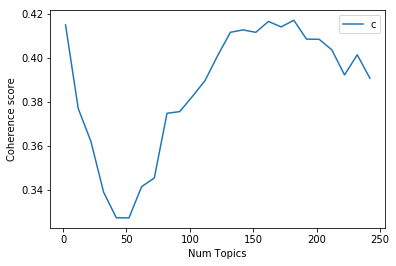

In [71]:
# Show graph
import matplotlib.pyplot as plt
limit=250; start=2; step=10;
x = range(start, limit, step)
plt.plot(x, coherence_values_cv)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values C-V"), loc='best')
plt.show()

In [72]:
coherence_values_cv, coherence_value_umass  = calculate_scores(dictionary=dictionary, corpus=corpus, texts=words, start=140, limit=150, step=1)

C:\Users\medacola\AppData\Local\Continuum\anaconda3\envs\topicmodel1\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


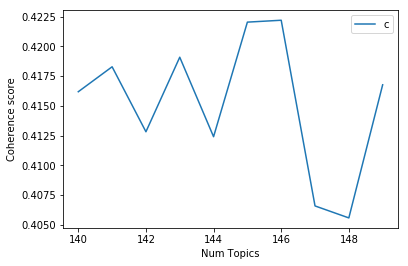

In [74]:
# Show graph
import matplotlib.pyplot as plt
limit=150; start=140; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values_cv)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values C-V"), loc='best')
plt.show()

In [75]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_cv):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 140  has Coherence Value of 0.4162
Num Topics = 141  has Coherence Value of 0.4183
Num Topics = 142  has Coherence Value of 0.4128
Num Topics = 143  has Coherence Value of 0.4191
Num Topics = 144  has Coherence Value of 0.4124
Num Topics = 145  has Coherence Value of 0.422
Num Topics = 146  has Coherence Value of 0.4222
Num Topics = 147  has Coherence Value of 0.4066
Num Topics = 148  has Coherence Value of 0.4056
Num Topics = 149  has Coherence Value of 0.4168


## We'll pick some topics

In [82]:
NUM_TOPICS = 25
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15, random_state=23)


topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(14, '0.045*"industrial" + 0.034*"one" + 0.018*"let" + 0.017*"say" + 0.016*"going" + 0.016*"days" + 0.015*"would" + 0.013*"tell" + 0.013*"south" + 0.013*"weeks"')
(9, '0.065*"party" + 0.049*"labour" + 0.042*"election" + 0.027*"government" + 0.019*"general" + 0.016*"majority" + 0.016*"opposition" + 0.016*"record" + 0.015*"one" + 0.015*"upon"')
(4, '0.024*"system" + 0.024*"service" + 0.024*"house" + 0.024*"public" + 0.024*"care" + 0.024*"health" + 0.022*"state" + 0.019*"people" + 0.018*"values" + 0.018*"nhs"')
(18, '0.034*"unemployment" + 0.031*"education" + 0.026*"people" + 0.021*"new" + 0.018*"training" + 0.017*"jobs" + 0.016*"real" + 0.013*"school" + 0.013*"young" + 0.013*"workers"')
(16, '0.024*"industrial" + 0.023*"services" + 0.022*"report" + 0.022*"inflation" + 0.021*"europe" + 0.021*"public" + 0.018*"social" + 0.014*"govern" + 0.014*"government" + 0.014*"problem"')
(6, '0.022*"conference" + 0.021*"debate" + 0.021*"yesterday" + 0.019*"principles" + 0.018*"bill" + 0.016*"socialist"

In [83]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.867993686049184

Coherence Score:  0.33169697817841803


In [84]:
# Visualize the topics
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

C:\Users\medacola\AppData\Local\Continuum\anaconda3\envs\topicmodel1\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.007948  0.111580       1        1  11.504609
20     0.145226  0.099730       2        1   7.577258
2      0.007043  0.120734       3        1   6.054889
9      0.174749 -0.020566       4        1   4.487629
17     0.079632 -0.025902       5        1   4.409842
15    -0.209409  0.004240       6        1   4.083829
3      0.226290 -0.061795       7        1   4.069584
0      0.035250  0.052546       8        1   4.030248
18    -0.107490  0.174005       9        1   3.723111
23     0.048865  0.189732      10        1   3.626115
11    -0.063578 -0.202200      11        1   3.525476
4     -0.101378  0.139828      12        1   3.511256
16    -0.008939 -0.022572      13        1   3.497503
19    -0.044236 -0.024141      14        1   3.496053
21     0.162108  0.084663      15        1   3.397264
24    -0.177532 -0.031263      16        1   3.393062
7     -0.029506 -0.061726      17        1   3.189104
13     0.092860 -0.090544      18        1   3.170187
12    -0.128329  0.042783      19        1   3.064370
14     0.106666 -0.063403      20        1   3.057360
22    -0.041937 -0.043509      21        1   2.770876
6      0.110280 -0.095345      22        1   2.671163
10    -0.002092 -0.103456      23        1   2.670066
8     -0.115200 -0.124449      24        1   2.599908
5     -0.151397 -0.048969      25        1   2.419240, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
17    Default  1053.000000          party  1053.000000  30.0000  30.0000
18    Default  1795.000000         people  1795.000000  29.0000  29.0000
135   Default  1023.000000            new  1023.000000  28.0000  28.0000
3433  Default   342.000000          shall   342.000000  27.0000  27.0000
598   Default   467.000000     industrial   467.000000  26.0000  26.0000
365   Default   569.000000         social   569.000000  25.0000  25.0000
29    Default  1129.000000         labour  1129.000000  24.0000  24.0000
81    Default   494.000000         change   494.000000  23.0000  23.0000
686   Default   380.000000       industry   380.000000  22.0000  22.0000
193   Default  1202.000000             us  1202.000000  21.0000  21.0000
791   Default   810.000000           year   810.000000  20.0000  20.0000
4     Default  1183.000000        britain  1183.000000  19.0000  19.0000
179   Default   424.000000       election   424.000000  18.0000  18.0000
108   Default  1719.000000     government  1719.000000  17.0000  17.0000
1831  Default   266.000000            per   266.000000  16.0000  16.0000
602   Default   403.000000        society   403.000000  15.0000  15.0000
740   Default   826.000000          world   826.000000  14.0000  14.0000
140   Default   521.000000         policy   521.000000  13.0000  13.0000
1829  Default   227.000000           cent   227.000000  12.0000  12.0000
293   Default   388.000000         public   388.000000  11.0000  11.0000
94    Default   368.000000     conference   368.000000  10.0000  10.0000
705   Default   323.000000      education   323.000000   9.0000   9.0000
645   Default   814.000000          years   814.000000   8.0000   8.0000
2649  Default   215.000000   unemployment   215.000000   7.0000   7.0000
747   Default   688.000000           must   688.000000   6.0000   6.0000
164   Default  1010.000000            one  1010.000000   5.0000   5.0000
531   Default   551.000000       economic   551.000000   4.0000   4.0000
70    Default   871.000000          would   871.000000   3.0000   3.0000
760   Default   584.000000           want   584.000000   2.0000   2.0000
2135  Default   247.000000       problems   247.000000   1.0000   1.0000
...       ...          ...            ...          ...      ...      ...
2672  Topic25    18.065025          books    18.863134   3.6785  -5.4357
578   Topic25    